# Readme
- 데이터 다운로드 경로 : http://theairlab.org/tartanair-dataset/
- 데이터 다운로드 방법 : 위 경로에 들어가서 neighobrhood 데이터를 다운받는다.
- 데이터 설명 : 일단 depth, segnmentation, image 파일만 사용한다. image는 png 파일로, depth, seg 정보는 numpy 파일로 되어있다. 
- flow 파일 : 드론 광학 센서
- pose 파일 : 드론 위치
- depth 파일 : depth 정보, 1차원 numpy
- seg 파일 : segmentation 정보, 1차원 numpy
- image 파일 : 원본 이미지, 3차원 png

# open depth npy sample

In [16]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [17]:
depth_sample_path = '/home/aiffel-dj17/aiffel/SIM2DATA/airsim_neighborhood/P002/depth_left/000199_left_depth.npy'

In [18]:
seg_sample_path = '/home/aiffel-dj17/aiffel/SIM2DATA/airsim_neighborhood/P002/seg_left/000199_left_seg.npy'

In [19]:
image_sample_path = '/home/aiffel-dj17/aiffel/SIM2DATA/airsim_neighborhood/P002/image_left/000199_left.png'

*numpy.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')*

In [20]:
depth_sample=np.load(depth_sample_path)

In [33]:
seg_sample=np.load(seg_sample_path)

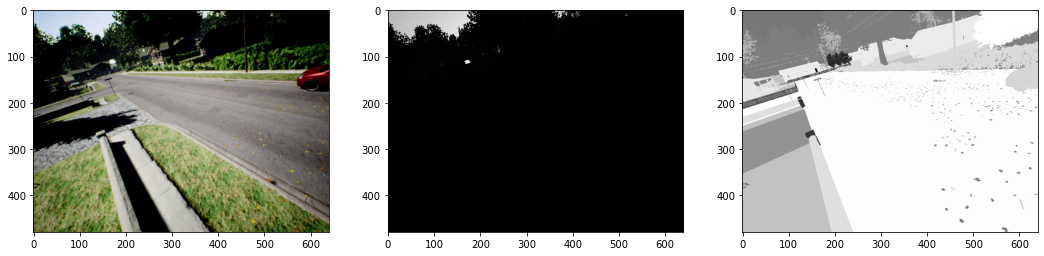

In [43]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
image_sample = imread(image_sample_path)
plt.imshow(image_sample)
plt.subplot(1, 3, 2)
plt.imshow(depth_sample, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(seg_sample, cmap='gray')

In [35]:
depth_sample.shape

(480, 640)

In [36]:
depth_sample

array([[1.0168000e+04, 1.0224000e+04, 1.0224000e+04, ..., 2.7265625e+01,
        2.7328125e+01, 2.7375000e+01],
       [1.0224000e+04, 1.0224000e+04, 1.0224000e+04, ..., 2.7390625e+01,
        2.7546875e+01, 4.9187500e+01],
       [1.0224000e+04, 1.0224000e+04, 1.0224000e+04, ..., 4.9187500e+01,
        4.8718750e+01, 4.8375000e+01],
       ...,
       [4.7070312e+00, 4.7031250e+00, 4.6992188e+00, ..., 3.0019531e+00,
        3.0000000e+00, 2.9980469e+00],
       [4.6914062e+00, 4.6875000e+00, 4.6835938e+00, ..., 2.9941406e+00,
        2.9941406e+00, 2.9921875e+00],
       [4.6796875e+00, 4.6757812e+00, 4.6718750e+00, ..., 2.9882812e+00,
        2.9863281e+00, 2.9863281e+00]], dtype=float32)

In [37]:
seg_sample

array([[146, 146, 146, ..., 253, 253, 253],
       [146, 146, 146, ..., 253, 253, 205],
       [146, 146, 146, ..., 205, 205, 205],
       ...,
       [205, 205, 205, ..., 251, 251, 251],
       [205, 205, 205, ..., 251, 251, 251],
       [205, 205, 205, ..., 251, 251, 251]], dtype=uint8)

In [39]:
print('seg sample max, min :',np.max(seg_sample),np.min(seg_sample))

seg sample max, min : 253 53


In [44]:
print('depth sample max, min :',np.max(depth_sample),np.min(depth_sample))

depth sample max, min : 14456.0 2.9863281


In [40]:
seg_sample.shape

(480, 640)

# depth, seg visualization (시각화)
- 출처 : https://docs.microsoft.com/ko-kr/azure/open-datasets/dataset-tartanair-simulation

In [45]:
def depth2vis(depth, maxthresh = 50):
    depthvis = np.clip(depth,0,maxthresh)
    depthvis = depthvis/maxthresh*255
    depthvis = depthvis.astype(np.uint8)
    depthvis = np.tile(depthvis.reshape(depthvis.shape+(1,)), (1,1,3))

    return depthvis

def seg2vis(segnp):
    colors = [(205, 92, 92), (0, 255, 0), (199, 21, 133), (32, 178, 170), (233, 150, 122), (0, 0, 255), (128, 0, 0), (255, 0, 0), (255, 0, 255), (176, 196, 222), (139, 0, 139), (102, 205, 170), (128, 0, 128), (0, 255, 255), (0, 255, 255), (127, 255, 212), (222, 184, 135), (128, 128, 0), (255, 99, 71), (0, 128, 0), (218, 165, 32), (100, 149, 237), (30, 144, 255), (255, 0, 255), (112, 128, 144), (72, 61, 139), (165, 42, 42), (0, 128, 128), (255, 255, 0), (255, 182, 193), (107, 142, 35), (0, 0, 128), (135, 206, 235), (128, 0, 0), (0, 0, 255), (160, 82, 45), (0, 128, 128), (128, 128, 0), (25, 25, 112), (255, 215, 0), (154, 205, 50), (205, 133, 63), (255, 140, 0), (220, 20, 60), (255, 20, 147), (95, 158, 160), (138, 43, 226), (127, 255, 0), (123, 104, 238), (255, 160, 122), (92, 205, 92),]
    segvis = np.zeros(segnp.shape+(3,), dtype=np.uint8)

    for k in range(256):
        mask = segnp==k
        colorind = k % len(colors)
        if np.sum(mask)>0:
            segvis[mask,:] = colors[colorind]

    return segvis

In [46]:
new_depth_sample = depth2vis(depth_sample)
new_seg_sample = seg2vis(seg_sample)

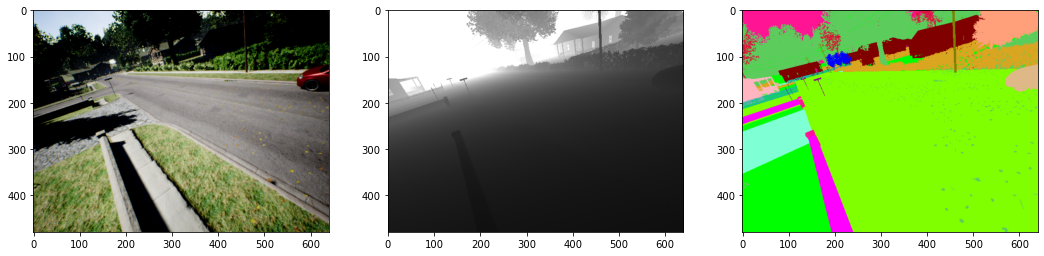

In [47]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
image_sample = imread(image_sample_path)
plt.imshow(image_sample)
plt.subplot(1, 3, 2)
plt.imshow(new_depth_sample )
plt.subplot(1, 3, 3)
plt.imshow(new_seg_sample)

In [48]:
print('new depth sample max, min :',np.max(new_depth_sample),np.min(new_depth_sample))

new depth sample max, min : 255 15
